# Merging Ordered and Time-Series Data
In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

## Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`. As always, pandas has been imported for you as pd.

In [1]:
import pandas as pd
sp500 = pd.read_excel('datasets/sp500.xlsx')
gdp = pd.read_excel('datasets/gdp.xlsx')

### Instructions 1/3
- Use `merge_ordered()` to merge `gdp` and `sp500` using a `left join` on `year` and `date`. Save the results as `gdp_sp500`.
- Print `gdp_sp500` and look at the returns for the year `2018`.

In [2]:
print(sp500.columns)
print(gdp.columns)

Index(['date', 'returns'], dtype='object')
Index(['country code', 'year', 'gdp'], dtype='object')


In [3]:
gdp_sp500 = pd.merge_ordered(gdp,sp500, how='left', left_on='year',right_on='date')
gdp_sp500

,country code,year,gdp,date,returns
0,USA,2010,1.499210e+19,2010.0,12.78
1,USA,2011,1.554260e+19,2011.0,0.00
2,USA,2012,1.619700e+19,2012.0,13.41
3,USA,2012,1.619700e+19,2012.0,13.41
4,USA,2013,1.678480e+19,2013.0,29.60
5,USA,2014,1.752170e+19,2014.0,11.39
6,USA,2015,1.821930e+19,2015.0,-0.73
7,USA,2016,1.870720e+19,2016.0,9.54
8,USA,2017,1.948540e+19,2017.0,19.42
9,USA,2018,2.049410e+19,NaN,NaN


### Instructions 2/3
Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to `forward fill` the missing value for returns, assigning this table to the variable `gdp_sp500`.

In [4]:
gdp_sp500 = pd.merge_ordered(gdp,sp500, how='left', left_on='year',right_on='date', fill_method='ffill')
gdp_sp500

,country code,year,gdp,date,returns
0,USA,2010,1.499210e+19,2010,12.78
1,USA,2011,1.554260e+19,2011,0.00
2,USA,2012,1.619700e+19,2012,13.41
3,USA,2012,1.619700e+19,2012,13.41
4,USA,2013,1.678480e+19,2013,29.60
5,USA,2014,1.752170e+19,2014,11.39
6,USA,2015,1.821930e+19,2015,-0.73
7,USA,2016,1.870720e+19,2016,9.54
8,USA,2017,1.948540e+19,2017,19.42
9,USA,2018,2.049410e+19,2017,19.42


### Instructions 3/3
- Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
- Print the correlation matrix of the `gdp_returns` table.

In [5]:
gdp_returns = gdp_sp500[['gdp','returns']]
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.212173
returns,0.212173,1.000000


You can see the different aspects of `merge_ordered()` and how you might use it on data that can be ordered. By using this function, you were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.

## Phillips curve using merge_ordered()

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

In [6]:
unemployment = pd.read_excel('datasets/unemployment.xlsx')
inflation = pd.read_excel('datasets/inflation.xlsx')

In [7]:
print(unemployment.columns)
print(inflation.columns)

Index(['date', 'unemployment_rate'], dtype='object')
Index(['date', 'cpi', 'seriesid', 'data_type'], dtype='object')


### Instructions
- Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an `inner join`, and save the results as `inflation_unemploy`.
- Print the `inflation_unemploy` variable.
- Using `inflation_unemploy`, create a `scatter` plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

In [8]:
inflation_unemploy = pd.merge_ordered(inflation,unemployment, how = 'inner', on='date')
inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


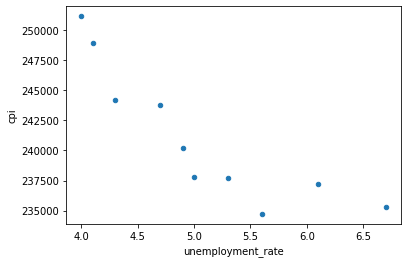

In [9]:
import matplotlib.pyplot as plt
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

## merge_ordered() caution, multiple columns

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded.

In [10]:
gdp = pd.read_excel('datasets/gdp_2.xlsx')
pop = pd.read_excel('datasets/pop.xlsx')

In [11]:
gdp.head(2)

,date,country,gdp,series_code
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD
1,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD


In [12]:
pop.head(2)

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL


### Instructions 1/2
Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the `fill feature`, save to `ctry_date`.

In [13]:
print(gdp.columns)
print(pop.columns)

Index(['date', 'country', 'gdp', 'series_code'], dtype='object')
Index(['date', 'country', 'pop', 'series_code'], dtype='object')


In [14]:
ctry_date = pd.merge_ordered(gdp,pop, on = ['date','country'], fill_method='ffill')
ctry_date.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,7983784599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,8058228597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,15732927900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL


### Instructions 2/2
Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (reverse of step 1) with the fill feature, saving this as `date_ctry`.

In [15]:
date_ctry = pd.merge_ordered(gdp,pop,on = ['country','date'], fill_method='ffill')
date_ctry.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,15732927900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,15824067810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,15619595350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

## Using merge_asof() to study stocks

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

In [16]:
jpm = pd.read_excel('datasets/jpm.xlsx')
wells = pd.read_excel('datasets/wells.xlsx')
bac = pd.read_excel('datasets/bac.xlsx')

In [17]:
print(jpm.columns)
print(wells.columns)
print(bac.columns)

Index(['date_time', 'close'], dtype='object')
Index(['date_time', 'close'], dtype='object')
Index(['date_time', 'close'], dtype='object')


### Instructions
- Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the **nearest** times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
- Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
- Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

In [18]:
jpm_wells = pd.merge_asof(jpm,wells, on='date_time', suffixes=('','_wells'), direction='nearest')
jpm_wells.head()

,date_time,close,close_wells
0,2017-11-17 15:35:17,981200,543227
1,2017-11-17 15:40:04,981800,543200
2,2017-11-17 15:45:01,977307,541900
3,2017-11-17 15:50:55,977400,541700
4,2017-11-17 15:55:00,978150,541841


In [19]:
jpm_wells_bac = pd.merge_asof(jpm_wells,bac, on='date_time', suffixes=('_jpm', '_bac'),direction='forward')
jpm_wells_bac.head()

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,981200,543227,26552
1,2017-11-17 15:40:04,981800,543200,26552
2,2017-11-17 15:45:01,977307,541900,26388
3,2017-11-17 15:50:55,977400,541700,26383
4,2017-11-17 15:55:00,978150,541841,26383


In [20]:
price_diffs = jpm_wells_bac.diff()
price_diffs.head(1)

,date_time,close_jpm,close_wells,close_bac
0,NaT,NaN,NaN,NaN


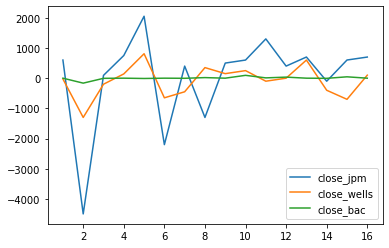

In [21]:
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.

## Using merge_asof() to create dataset

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you.

In [22]:
gdp = pd.read_excel('datasets/gdp_3.xlsx')
recession = pd.read_excel('datasets/recession.xlsx')

In [23]:
gdp.head(2)

,date,gdp
0,1979-01-01,2526610
1,1979-04-01,2591247


In [24]:
recession.head(2)

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal


### Instructions
- Using `merge_asof()`, merge `gdp` and `recession` on `date`, with gdp as the left table. Save to the variable `gdp_recession`.
- Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.
- Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.

In [25]:
gdp_recession = pd.merge_asof(gdp, recession, on='date')
gdp_recession.head(2)

,date,gdp,econ_status
0,1979-01-01,2526610,NaN
1,1979-04-01,2591247,NaN


In [26]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

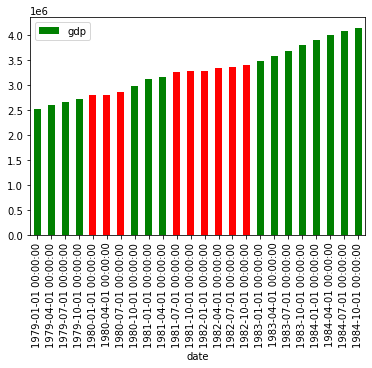

In [27]:
gdp_recession.plot(kind='bar',y='gdp',x='date',color=is_recession,rot=90)
plt.show()

You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

## Subsetting rows with .query()

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables `gdp` and `pop` have been loaded for you.

In [28]:
gdp = pd.read_excel('datasets/gdp_2.xlsx')
pop = pd.read_excel('datasets/pop.xlsx')

### Instructions 1/4
Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the `fill feature`, save to `gdp_pop` and print.

In [29]:
gdp.head(2)

,date,country,gdp,series_code
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD
1,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD


In [30]:
pop.head(2)

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL


In [31]:
gdp_pop = pd.merge_ordered(gdp, pop, on = ['country','date'], fill_method='ffill')
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,15732927900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,15824067810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,15619595350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


### Instructions 2/3
Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.

In [32]:
gdp_pop['gdp_per_capita'] = gdp_pop['gdp']/gdp_pop['pop']
gdp_pop.head(2)

,date,country,gdp,series_code_x,pop,series_code_y,gdp_per_capita
0,1990-01-01,Australia,15805113240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,926.165873
1,1990-04-01,Australia,15826358160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,927.410807


### Instructions 3/4
Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.

In [33]:
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita',index='date',columns='country')
gdp_pivot.head(3)

country,Australia,Sweden
date,,
1990-01-01,926.165873,932.812071
1990-04-01,927.410807,941.509983
1990-07-01,921.935875,934.407080


### Instructions 4/4
Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.

In [34]:
gdp_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 1990-01-01 to 1993-09-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Australia  16 non-null     float64
 1   Sweden     16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


In [35]:
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')
recent_gdp_pop

country,Australia,Sweden
date,,
1991-01-01,903.702578,922.836037
1991-04-01,902.505396,917.600302
1991-07-01,906.247730,917.736206
1991-09-01,906.873736,925.346828
1992-01-01,902.635502,915.901109
1992-04-01,909.104470,912.086662
1992-07-01,918.309094,910.290665
1992-09-01,937.183314,888.281515
1993-01-01,934.496491,869.221283


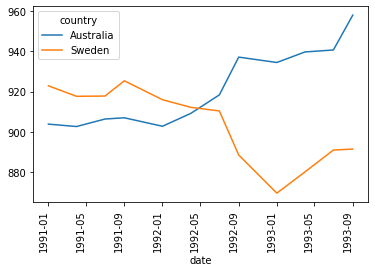

In [36]:
# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. By using the `.query()` method, you were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.

## Using .melt() to reshape government data

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the IPython shell before beginning the exercise.

In [37]:
ur_wide = pd.read_excel('datasets/ur_wide.xlsx')
ur_wide.to_csv('datasets/ur_wide.csv')
ur_wide=pd.read_csv('datasets/ur_wide.csv', index_col = 0, dtype={'year':object})

### Instructions
- Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
- Add a column to `ur_tall` named `date` which combines the `year` and `month` columns as `year-month` format into a larger string, and `converts` it to a `date data type`.
- Sort `ur_tall` by date and save as ur_sorted.
- Using `ur_sorted`, plot `unempl_rate` on the `y-axis` and `date` on the `x-axis`.

In [38]:
ur_wide.head(1)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3


In [39]:
ur_tall = ur_wide.melt(id_vars=['year'], var_name=['month'], value_name='unempl_rate')
ur_tall.head(10)

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6
5,2015,jan,5.7
6,2016,jan,4.9
7,2017,jan,4.7
8,2018,jan,4.1
9,2019,jan,4.0


In [40]:
ur_tall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         132 non-null    object 
 1   month        132 non-null    object 
 2   unempl_rate  123 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [41]:
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
ur_tall

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01
...,...,...,...,...
127,2016,dec,4.7,2016-12-01
128,2017,dec,4.1,2017-12-01
129,2018,dec,3.9,2018-12-01
130,2019,dec,3.5,2019-12-01


In [42]:
ur_sorted = ur_tall.sort_values('date')
ur_sorted

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
11,2010,feb,9.8,2010-02-01
22,2010,mar,9.9,2010-03-01
33,2010,apr,9.9,2010-04-01
44,2010,may,9.6,2010-05-01
...,...,...,...,...
87,2020,aug,NaN,2020-08-01
98,2020,sep,NaN,2020-09-01
109,2020,oct,NaN,2020-10-01
120,2020,nov,NaN,2020-11-01


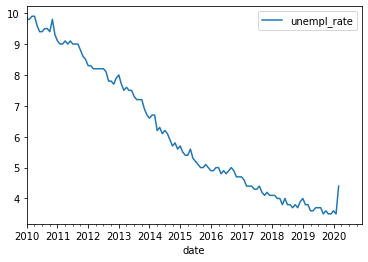

In [43]:
ur_sorted.plot(y='unempl_rate', x='date')
plt.show()

The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (especially by governments) in a format that is easily read by people but not by machines. The .melt() method is a handy tool for reshaping data into a useful form.

## Using .melt() for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

In [44]:
ten_yr = pd.read_csv('datasets/ten_yr.csv', sep=';')
dji = pd.read_csv('datasets/dji.csv', index_col=0)

In [45]:
ten_yr.head(1)

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.0144,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544


In [46]:
dji.head(1)

,date,close
0,2007-02-01,0.005094


### Instructions
- Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
- Using the `.query()` method, select only those rows were metric equals `'close'`, and save to `bond_perc_close`.
- Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an `inner join`, and set `suffixes` equal to`('_dow', '_bond')`. Save the result to `dow_bond`.
- Using `dow_bond`, plot only the `Dow` and `bond` values.

In [47]:
bond_perc = ten_yr.melt(id_vars=['metric'], var_name=['date'], value_name='close')
bond_perc.head(4)

,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.057190


In [48]:
bond_perc_close = bond_perc.query('metric == "close"')

In [49]:
dow_bond = pd.merge_ordered(dji, bond_perc_close, how= 'inner', on= 'date', suffixes=(['_dow','_bond']))
dow_bond.head()

,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057190
1,2007-03-01,-0.026139,close,0.021538
2,2007-04-01,0.048525,close,-0.003873
3,2007-05-01,0.052007,close,0.056156
4,2007-06-01,-0.016070,close,0.029243


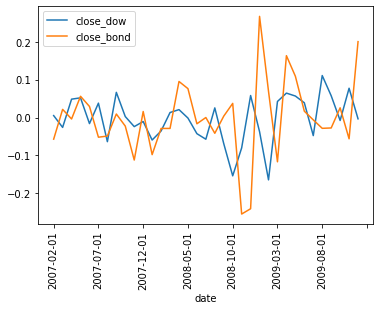

In [50]:
dow_bond.plot(y=['close_dow','close_bond'],x='date',rot=90)
plt.show()

You used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.